In [1]:
# !pip install dask

In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
plt.rc('font', family='Malgun Gothic')

pd.set_option('display.max_columns', None)

In [2]:
# 파알 경로 설정
folder_path = "data/"
raw_path = folder_path+"raw_data/"
concat_path = folder_path + 'concat/'

### 연도로 분리된 데이터 concat

In [4]:
# 연도가 나뉘어져 있는 폴더 확인
concat_list = os.listdir(concat_path)
concat_list

['서울시_상권분석서비스(점포-상권)_2021년.csv',
 '서울시_상권분석서비스(점포-상권)_2022년.csv',
 '서울시_상권분석서비스(점포-상권)_2023년.csv',
 '서울시_상권분석서비스(추정매출-상권)_2021년.csv',
 '서울시_상권분석서비스(추정매출-상권)_2022년.csv',
 '서울시_상권분석서비스(추정매출-상권)_2023년.csv']

#### 점포 - 상권 concat

In [6]:
# 점포-상권 데이터 concat
store_concat = [pd.read_csv(concat_path + file, encoding="cp949") for file in concat_list[:3]]
merged_store = pd.concat(store_concat, ignore_index=True)
merged_store.to_csv('data/raw_data/서울시_상권분석서비스(점포-상권).csv',index=False) # 상위 폴더에 병합된 파일 생성
merged_store.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20211,D,발달상권,3120070,한성대입구역,CS300009,청과상,3,3,0,0,0,0,0
1,20211,A,골목상권,3110300,삼선동주민센터,CS300021,문구,2,3,0,0,0,0,1
2,20211,A,골목상권,3110333,돌곶이역 5번,CS300001,슈퍼마켓,4,4,0,0,0,0,0
3,20211,D,발달상권,3120075,월곡역,CS100006,패스트푸드점,7,11,9,1,0,0,4
4,20211,A,골목상권,3110334,석관중앙교회,CS300022,화장품,4,4,25,1,0,0,0


#### 추정매출 - 상권 concat

In [8]:
# 추정매출 - 상권 데이터 concat
sales_concat = [pd.read_csv(concat_path + file, encoding="cp949") for file in concat_list[3:]]

merged_sales = pd.concat(sales_concat, ignore_index=True)
merged_sales.to_csv('data/raw_data/서울시_상권분석서비스(추정매출-상권).csv',index=False)
merged_sales.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20211,A,골목상권,3111083,GS강동자이아파트,CS200003,예술학원,17680156,108,17680156,0,3552000,5426667,7498667,1202822,0,0,0,0,0,0,11858822,5821334,0,17680156,0,0,0,11858822,5821334,0,0,108,0,20,39,39,10,0,0,0,0,0,0,68,40,0,108,0,0,0,68,40,0,0
1,20211,D,발달상권,3120216,경기고교사거리(경기고교앞사거리),CS300043,전자상거래업,332294,5,332294,0,0,0,332294,0,0,0,0,0,0,332294,0,0,0,0,332294,0,0,0,332294,0,0,5,0,0,0,5,0,0,0,0,0,0,5,0,0,0,0,5,0,0,0,5,0,0
2,20211,A,골목상권,3110052,장충초등학교,CS300043,전자상거래업,126040,5,126040,0,0,0,0,0,126040,0,0,0,0,0,0,126040,0,0,126040,0,0,0,126040,0,0,5,0,0,0,0,0,5,0,0,0,0,0,0,5,0,0,5,0,0,0,5,0,0
3,20211,A,골목상권,3110569,홍대땡땡거리,CS300043,전자상거래업,9000000,36,0,9000000,0,0,0,0,0,9000000,0,0,0,0,0,9000000,0,9000000,0,0,9000000,0,0,0,0,0,36,0,0,0,0,0,36,0,0,0,0,0,36,0,36,0,0,36,0,0,0,0
4,20211,A,골목상권,3110983,국립국악고등학교,CS300043,전자상거래업,22807410,456,22807410,0,0,22807410,0,0,0,0,0,0,0,22807410,0,0,0,22807410,0,0,0,0,0,0,22807410,456,0,0,456,0,0,0,0,0,0,0,456,0,0,0,456,0,0,0,0,0,0,456


### Raw data 불러오기

In [10]:
# data 파일 리스트
raw_path = folder_path+"raw_data/"
file_list = os.listdir(raw_path)
file_list

['서울시 상권분석서비스(길단위인구-상권).csv',
 '서울시 상권분석서비스(상권변화지표-상권).csv',
 '서울시 상권분석서비스(상주인구-상권).csv',
 '서울시 상권분석서비스(소득소비-상권).csv',
 '서울시 상권분석서비스(아파트-상권).csv',
 '서울시 상권분석서비스(영역-상권).csv',
 '서울시 상권분석서비스(직장인구-상권).csv',
 '서울시 상권분석서비스(집객시설-상권).csv',
 '서울시_상권분석서비스(점포-상권).csv',
 '서울시_상권분석서비스(추정매출-상권).csv',
 '행정동별 임대료.xlsx']

In [11]:
# csv파일 불러들이는 함수
def read_csv(csvfile):
    try: 
        file = pd.read_csv(raw_path + csvfile, encoding="cp949")
    except:
        file = pd.read_csv(raw_path + csvfile, encoding="UTF-8")

    # 2020 ~ 2023 데이터 필터
    file = file[file.iloc[:,0].astype(str).str.contains("2021|2022|2023", regex=True)]
    
    return file

In [12]:
# 각 파일 불러오기
street_pop = read_csv(file_list[0])    # 길단위인구-상권
change = read_csv(file_list[1])        # 상권변화지표-상권
stay_pop = read_csv(file_list[2])      # 상주인구-상권
income_spend = read_csv(file_list[3])  # 소득소비-상권
apt = read_csv(file_list[4])           # 아파트-상권
office_pop = read_csv(file_list[6])    # 직장인구-상권
attraction_facility = read_csv(file_list[7]) # 집객시설-상권
store = read_csv(file_list[8])               # 점포-상권
estimated_sales = read_csv(file_list[9])     # 추정매출-상권

In [13]:
# 데이터 목록
data_dict = {
    "street_pop": street_pop,                    # 길단위인구-상권
    "change": change,                            # 상권변화지표-상권
    "stay_pop": stay_pop,                        # 상주인구-상권
    "income_spend": income_spend,                # 소득소비-상권
    "apt": apt,                                  # 아파트-상권
    "office_pop": office_pop,                    # 직장인구-상권
    "attraction_facility": attraction_facility,  # 집객시설-상권
    "store": store,                              # 점포-상권
    "estimated_sales": estimated_sales           # 추정매출-상권
}

In [14]:
# 날짜 필터링 확인
for i in list(data_dict.values()):
    print(sorted(i.iloc[:,0].unique()))

[20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232, 20233, 20234]
[20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232, 20233, 20234]
[20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232, 20233, 20234]
[20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232, 20233, 20234]
[20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232, 20233, 20234]
[20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232, 20233, 20234]
[20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232, 20233, 20234]
[20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232, 20233, 20234]
[20211, 20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232, 20233, 20234]


In [15]:
# 데이터 shape 확인
for i in list(data_dict.values()):
    print(i.shape)

(19794, 27)
(19800, 11)
(19576, 29)
(19572, 17)
(17623, 20)
(19476, 26)
(18936, 25)
(912939, 14)
(249331, 55)


In [16]:
# Null 값이 있는 데이터프레임의 이름만 추출
null_df_names = [name for name, df in data_dict.items() if df.isnull().sum().sum() > 0]
print(null_df_names)

['income_spend', 'apt', 'attraction_facility']


#### income 결측치 제거

In [18]:
income_spend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19572 entries, 653 to 37424
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준_년분기_코드     19572 non-null  int64  
 1   상권_구분_코드      19572 non-null  object 
 2   상권_구분_코드_명    19572 non-null  object 
 3   상권_코드         19572 non-null  int64  
 4   상권_코드_명       19572 non-null  object 
 5   월_평균_소득_금액    19464 non-null  float64
 6   소득_구간_코드      19464 non-null  float64
 7   지출_총금액        19152 non-null  float64
 8   식료품_지출_총금액    19152 non-null  float64
 9   의류_신발_지출_총금액  19152 non-null  float64
 10  생활용품_지출_총금액   19152 non-null  float64
 11  의료비_지출_총금액    19152 non-null  float64
 12  교통_지출_총금액     19152 non-null  float64
 13  여가_지출_총금액     19152 non-null  float64
 14  문화_지출_총금액     19152 non-null  float64
 15  교육_지출_총금액     19152 non-null  float64
 16  유흥_지출_총금액     19152 non-null  float64
dtypes: float64(12), int64(2), object(3)
memory usage: 2.7+ MB


In [19]:
income_spend = read_csv(file_list[3])  # 소득소비-상권

In [20]:
income_spend[income_spend['소득_구간_코드'].isnull()].head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
6711,20223,R,전통시장,3130254,남서울상가,NaN,NaN,4303050.0,1826695.0,394475.0,313295.0,961910.0,292245.0,98675.0,149810.0,146455.0,119490.0
18714,20211,A,골목상권,3110870,신림주공2단지(광신고등학교),NaN,NaN,525158961.0,182775990.0,56778514.0,35000230.0,89076459.0,59792839.0,16010293.0,17283761.0,49388632.0,19052243.0
18958,20211,D,발달상권,3120025,롯데백화점(시청광장 지하쇼핑센터),NaN,NaN,42776800.0,9753700.0,6378372.0,3414290.0,4949780.0,8313272.0,3229160.0,1234068.0,3606108.0,1898050.0
19066,20211,D,발달상권,3120137,문래역(문래로데오거리),NaN,NaN,63883830.0,12544623.0,8205981.0,5474138.0,6336884.0,11460297.0,3785327.0,1725862.0,11882007.0,2468711.0
19197,20211,R,전통시장,3130025,삼익패션타운(남대문시장),NaN,NaN,116229093.0,26285646.0,16688661.0,9929826.0,13192368.0,22183227.0,8157681.0,3433797.0,11270217.0,5087670.0


In [24]:
# null인 값들 출력
income_spend[income_spend['지출_총금액'].isnull()].head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
653,20231,A,골목상권,3110648,양천향교역 7번,3402010.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1492,20231,R,전통시장,3130176,유진상가,2995951.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1541,20231,R,전통시장,3130220,등마루시장,3520212.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1590,20231,R,전통시장,3130309,은마종합상점가,4228251.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,20231,A,골목상권,3110806,서울시립영등포장애인복지관,1408143.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
income_spend = income_spend.dropna(axis=0)
income_spend.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
884,20223,A,골목상권,3110019,창덕궁,2496875.0,6.0,2.661248e+08,88835562.0,30923562.0,19943040.0,44779439.0,36997427.0,8813062.0,8884951.0,15987046.0,10960757.0
1345,20223,A,골목상권,3110306,미아초등학교,2549976.0,6.0,4.142648e+08,114568496.0,48710658.0,29341424.0,55024647.0,64536287.0,14323780.0,12800457.0,58253806.0,16705275.0
1968,20223,A,골목상권,3110307,길음역 7번,4793914.0,8.0,1.066063e+09,259578641.0,125742124.0,89586270.0,128954361.0,174400092.0,47609113.0,31412441.0,168144886.0,40635384.0
2861,20223,A,골목상권,3110308,길음역 8번,2332887.0,5.0,6.741641e+08,188717620.0,80833915.0,51712644.0,96246130.0,107874289.0,25516219.0,20847045.0,74330522.0,28085755.0
3579,20231,A,골목상권,3110384,문이교,2383452.0,5.0,4.436807e+08,120018885.0,54054181.0,32528961.0,62395583.0,72915783.0,17962680.0,13068622.0,52337659.0,18398383.0


#### apt 결측치 제거

In [27]:
apt.isnull().sum()

기준_년분기_코드                     0
상권_구분_코드                      0
상권_구분_코드_명                    0
상권_코드                         0
상권_코드_명                       0
아파트_단지_수                      0
아파트_면적_66_제곱미터_미만_세대_수      444
아파트_면적_66_제곱미터_세대_수        1431
아파트_면적_99_제곱미터_세대_수        6708
아파트_면적_132_제곱미터_세대_수      11983
아파트_면적_165_제곱미터_세대_수      14234
아파트_가격_1_억_미만_세대_수         3703
아파트_가격_1_억_세대_수            1301
아파트_가격_2_억_세대_수            1801
아파트_가격_3_억_세대_수            6134
아파트_가격_4_억_세대_수           10014
아파트_가격_5_억_세대_수           12295
아파트_가격_6_억_이상_세대_수        12953
아파트_평균_면적                     0
아파트_평균_시가                     0
dtype: int64

In [28]:
# 세대 수 없는 경우 null값을 0으로 대체 
apt.fillna(0, inplace=True)
apt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17623 entries, 1 to 25048
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   기준_년분기_코드               17623 non-null  int64  
 1   상권_구분_코드                17623 non-null  object 
 2   상권_구분_코드_명              17623 non-null  object 
 3   상권_코드                   17623 non-null  int64  
 4   상권_코드_명                 17623 non-null  object 
 5   아파트_단지_수                17623 non-null  int64  
 6   아파트_면적_66_제곱미터_미만_세대_수  17623 non-null  float64
 7   아파트_면적_66_제곱미터_세대_수     17623 non-null  float64
 8   아파트_면적_99_제곱미터_세대_수     17623 non-null  float64
 9   아파트_면적_132_제곱미터_세대_수    17623 non-null  float64
 10  아파트_면적_165_제곱미터_세대_수    17623 non-null  float64
 11  아파트_가격_1_억_미만_세대_수      17623 non-null  float64
 12  아파트_가격_1_억_세대_수         17623 non-null  float64
 13  아파트_가격_2_억_세대_수         17623 non-null  float64
 14  아파트_가격_3_억_세대_수         17623 non-null  flo

#### attraction_facility 결측치 제거

In [30]:
attraction_facility.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18936 entries, 0 to 25240
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준_년분기_코드   18936 non-null  int64  
 1   상권_구분_코드    18936 non-null  object 
 2   상권_구분_코드_명  18936 non-null  object 
 3   상권_코드       18936 non-null  int64  
 4   상권_코드_명     18936 non-null  object 
 5   집객시설_수      18936 non-null  int64  
 6   관공서_수       7560 non-null   float64
 7   은행_수        5844 non-null   float64
 8   종합병원_수      276 non-null    float64
 9   일반_병원_수     1584 non-null   float64
 10  약국_수        12108 non-null  float64
 11  유치원_수       1812 non-null   float64
 12  초등학교_수      156 non-null    float64
 13  중학교_수       48 non-null     float64
 14  고등학교_수      132 non-null    float64
 15  대학교_수       1008 non-null   float64
 16  백화점_수       132 non-null    float64
 17  슈퍼마켓_수      1260 non-null   float64
 18  극장_수        1008 non-null   float64
 19  숙박_시설_수     1740 non-null   fl

In [31]:
attraction_facility = attraction_facility.drop(columns =['철도_역_수'], axis=1)
attraction_facility.fillna(0, inplace=True)
attraction_facility.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,20222,A,골목상권,3110010,평창동서측,34,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
5,20222,A,골목상권,3110203,떡전교사거리,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,20233,A,골목상권,3110004,대신고등학교,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7,20231,A,골목상권,3110017,정독도서관,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
10,20233,A,골목상권,3110008,배화여자대학교(박노수미술관),9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [33]:
# 결측치 제거 후 데이터 재할당
data_dict = {
    "street_pop": street_pop,                    # 길단위인구-상권
    "change": change,                            # 상권변화지표-상권
    "stay_pop": stay_pop,                        # 상주인구-상권
    "income_spend": income_spend,                # 소득소비-상권
    "apt": apt,                                  # 아파트-상권
    "office_pop": office_pop,                    # 직장인구-상권
    "attraction_facility": attraction_facility,  # 집객시설-상권
    "store": store,                              # 점포-상권
    "estimated_sales": estimated_sales           # 추정매출-상권
}

In [34]:
# 모든 데이터 프레임의 공통 칼럼 찾기
common_columns = list(set.intersection(*[set(df.columns) for df in list(data_dict.values())]))

print("공통된 컬럼:", common_columns)

공통된 컬럼: ['상권_구분_코드', '상권_코드_명', '기준_년분기_코드', '상권_코드', '상권_구분_코드_명']


In [35]:
# 기준이 되는 첫 번째 데이터프레임
merged_df = list(data_dict.values())[0]

# 데이터프레임들을 순차적으로 right join
for df in list(data_dict.values())[1:-2]:
    merged_df = merged_df.merge(df, on=common_columns, how='right')

merged_df.to_csv(folder_path+'base_data.csv', index=False)
merged_df = merged_df.dropna()

# 결과 확인
print(f"데이터 크기 : {merged_df.shape}")
merged_df.head()

데이터 크기 : (16878, 124)


,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_00_06_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,20222,A,골목상권,3110010,평창동서측,172284.0,75191.0,97093.0,31720.0,16285.0,20838.0,25507.0,30188.0,47745.0,53917.0,36054.0,16172.0,15923.0,24752.0,25463.0,24544.0,24579.0,24775.0,24522.0,24098.0,24841.0,24925.0,HH,정체,112.0,57.0,98.0,50.0,3134.0,1408.0,1726.0,428.0,389.0,369.0,499.0,549.0,900.0,208.0,189.0,160.0,216.0,244.0,391.0,220.0,200.0,209.0,283.0,305.0,509.0,1417.0,0.0,1417.0,4492856.0,8.0,2.243587e+09,538964071.0,281544320.0,169148070.0,283258355.0,404132363.0,96928651.0,63144544.0,309164149.0,97302172.0,58.0,69.0,171.0,52.0,20.0,73.0,1.0,74.0,101.0,99.0,34.0,28.0,48.0,131.0,5.362314e+08,5240.0,2651.0,2589.0,1.0,324.0,1250.0,2239.0,1231.0,195.0,0.0,76.0,342.0,1157.0,943.0,133.0,1.0,248.0,908.0,1082.0,288.0,62.0,34,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,20222,A,골목상권,3110203,떡전교사거리,628526.0,290518.0,338009.0,69036.0,79622.0,76486.0,86363.0,96503.0,220518.0,153170.0,134442.0,81911.0,78318.0,104534.0,76150.0,89822.0,88847.0,88332.0,88075.0,89507.0,91523.0,92419.0,HL,상권축소,126.0,44.0,98.0,50.0,1769.0,905.0,864.0,160.0,216.0,194.0,235.0,329.0,635.0,87.0,117.0,113.0,120.0,180.0,288.0,73.0,99.0,81.0,115.0,149.0,347.0,1013.0,0.0,1013.0,2494473.0,6.0,8.329220e+08,242289709.0,97003557.0,60051214.0,119398061.0,127976747.0,26871100.0,26282146.0,98813242.0,34236198.0,17.0,118.0,24.0,1.0,0.0,0.0,43.0,89.0,11.0,0.0,0.0,0.0,0.0,51.0,1.299804e+08,99.0,63.0,36.0,1.0,9.0,15.0,32.0,29.0,13.0,1.0,0.0,7.0,26.0,20.0,9.0,0.0,9.0,8.0,6.0,9.0,4.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20233,A,골목상권,3110004,대신고등학교,642932.0,298259.0,344674.0,123865.0,75286.0,88184.0,103762.0,98593.0,153242.0,124795.0,132528.0,88418.0,91388.0,125700.0,80105.0,92747.0,93200.0,92953.0,91929.0,91969.0,90272.0,89864.0,HH,정체,125.0,72.0,101.0,51.0,529.0,259.0,270.0,51.0,55.0,57.0,78.0,94.0,194.0,28.0,32.0,28.0,39.0,49.0,83.0,23.0,23.0,29.0,39.0,45.0,111.0,244.0,0.0,244.0,2644953.0,6.0,7.127728e+08,205649728.0,84170011.0,51668351.0,100817261.0,111843712.0,23406627.0,22615164.0,82865155.0,29736776.0,5.0,12.0,11.0,0.0,0.0,0.0,6.0,6.0,11.0,0.0,0.0,0.0,0.0,53.0,1.406800e+08,32.0,14.0,18.0,0.0,3.0,4.0,8.0,14.0,3.0,0.0,1.0,0.0,3.0,8.0,2.0,0.0,2.0,4.0,5.0,6.0,1.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,20231,A,골목상권,3110017,정독도서관,448804.0,208537.0,240268.0,60995.0,64626.0,72655.0,82632.0,71670.0,96226.0,96433.0,91531.0

In [36]:
# 공통 컬럼 찾기
common_columns = list(set(estimated_sales.columns) & set(store.columns) & set(merged_df.columns))
common_columns

['상권_구분_코드', '상권_코드_명', '기준_년분기_코드', '상권_코드', '상권_구분_코드_명']

In [37]:
# 공통 코드명 찾기
common_values = set(estimated_sales['상권_코드_명']) & set(store['상권_코드_명']) & set(merged_df['상권_코드_명'])

# 공통 '상권_코드_명'이 아닌 값은 제거
estimated_sales = estimated_sales[estimated_sales['상권_코드_명'].isin(common_values)]
store = store[store['상권_코드_명'].isin(common_values)]
merged_df = merged_df[merged_df['상권_코드_명'].isin(common_values)]

In [38]:
# 행정동 데이터 붙이기
location = pd.read_csv(raw_path + '서울시 상권분석서비스(영역-상권).csv', usecols=[3,9] , encoding='euc-kr')
store = store.merge(location, on=['상권_코드_명'], how='left')

In [35]:
# null값 확인
store['행정동_코드_명'].isnull().sum()

0

In [39]:
# 참조 테이블을 생성 (유니크한 값들만)
reference_table = merged_df[['상권_코드_명', '상권_구분_코드_명', '상권_코드', '상권_구분_코드']].drop_duplicates().reset_index(drop=True)
reference_table.loc[:, '상권_라벨'] = reference_table['상권_코드_명'] + reference_table['상권_구분_코드_명'] + reference_table['상권_코드'].astype(str) + reference_table['상권_구분_코드'].astype(str)

# LabelEncoder를 사용하여 라벨 인코딩
label_encoder = LabelEncoder()
reference_table.loc[:, '상권_라벨'] = label_encoder.fit_transform(reference_table['상권_라벨'])

reference_table.head()

,상권_코드_명,상권_구분_코드_명,상권_코드,상권_구분_코드,상권_라벨
0,평창동서측,골목상권,3110010,A,1273
1,떡전교사거리,골목상권,3110203,A,403
2,대신고등학교,골목상권,3110004,A,313
3,정독도서관,골목상권,3110017,A,1168
4,배화여자대학교(박노수미술관),골목상권,3110008,A,539


In [43]:
category_columns = list(set(estimated_sales.columns) & set(store.columns))
category_columns

['상권_구분_코드',
 '서비스_업종_코드',
 '서비스_업종_코드_명',
 '상권_코드_명',
 '기준_년분기_코드',
 '상권_코드',
 '상권_구분_코드_명']

In [68]:
abc = store.merge(estimated_sales, on=category_columns, how='left')
abc = abc.dropna(subset=['당월_매출_금액'])
abc = abc.select_dtypes(exclude=['object'])
abc_corr = abc.corr()['당월_매출_건수']
filtered_corr = abc_corr[~abc_corr.index.str.contains("매출")]

print(filtered_corr)


기준_년분기_코드     0.015712
상권_코드        -0.001626
점포_수          0.165312
유사_업종_점포_수    0.186644
개업_율         -0.004388
개업_점포_수       0.173997
폐업_률          0.002537
폐업_점포_수       0.176832
프랜차이즈_점포_수    0.449991
Name: 당월_매출_건수, dtype: float64


In [70]:
bbc_columns = list(set(estimated_sales.columns) & set(merged_df.columns))
bbc = estimated_sales.merge(merged_df, on=bbc_columns, how='left')
bbc = bbc.dropna(subset=['당월_매출_금액'])
bbc = bbc.select_dtypes(exclude=['object'])
bbc_corr = bbc.corr()['당월_매출_금액']
filtered_corr = bbc_corr[~bbc_corr.index.str.contains("매출")]
filtered_corr.sort_values()

아파트_단지_수                 -0.028796
아파트_가격_1_억_세대_수          -0.027179
여성연령대_60_이상_상주인구_수       -0.026312
아파트_면적_66_제곱미터_미만_세대_수   -0.024955
여성연령대_50_상주인구_수          -0.024859
                            ...   
집객시설_수                    0.096712
버스_정거장_수                  0.099553
은행_수                      0.100952
아파트_가구_수                       NaN
공항_수                           NaN
Name: 당월_매출_금액, Length: 119, dtype: float64

In [71]:
def add_label(table):
    table = table.merge(reference_table[['상권_코드_명', '상권_구분_코드_명', '상권_코드', '상권_구분_코드', '상권_라벨']],
                                on=['상권_코드_명', '상권_구분_코드_명', '상권_코드', '상권_구분_코드'],
                                how='left')
    return table

store_label = add_label(store)
estimated_sales_label = add_label(estimated_sales)
merged_df_label = add_label(merged_df)

In [72]:
def remove_str(table):
    table = table.drop(columns=['상권_코드_명', '상권_구분_코드_명', '상권_코드', '상권_구분_코드'])
    return table

store_cleaned = remove_str(store_label)
estimated_sales_cleaned = remove_str(estimated_sales_label)
merged_df_cleaned = remove_str(merged_df_label)

print(store_cleaned.shape,estimated_sales_cleaned.shape, merged_df_cleaned.shape)

(821349, 12) (230077, 52) (16323, 121)


In [76]:
# 서비스 업종 라벨 참조 테이블 생성 및 라벨인코딩
reference_store = store[['서비스_업종_코드', '서비스_업종_코드_명']].drop_duplicates().reset_index(drop=True)
reference_store.loc[:, '서비스_라벨'] = reference_store['서비스_업종_코드'] + reference_store['서비스_업종_코드_명']

reference_store.loc[:, '서비스_라벨'] = label_encoder.fit_transform(reference_store['서비스_라벨'])

reference_store.head()

,서비스_업종_코드,서비스_업종_코드_명,서비스_라벨
0,CS300009,청과상,65
1,CS300021,문구,77
2,CS300001,슈퍼마켓,57
3,CS100006,패스트푸드점,5
4,CS300022,화장품,78


In [78]:
def add_label_store(table):
    table = table.merge(reference_store[['서비스_업종_코드', '서비스_업종_코드_명','서비스_라벨']],
                                on=['서비스_업종_코드', '서비스_업종_코드_명'],
                                how='left')
    return table

store_cleaned = add_label_store(store_cleaned)
estimated_sales_cleaned = add_label_store(estimated_sales_cleaned)

In [80]:
store_cleaned = store_cleaned.drop(columns = ['서비스_업종_코드', '서비스_업종_코드_명'])
estimated_sales_cleaned = estimated_sales_cleaned.drop(columns = ['서비스_업종_코드', '서비스_업종_코드_명'])

**최종 데이터 저장**

In [82]:
reference_table.to_csv(folder_path+'loc_ref.csv', index=False ,encoding='utf-8-sig')
reference_store.to_csv(folder_path+'store_ref.csv', index=False ,encoding='utf-8-sig' )
store_cleaned.to_csv(folder_path+'store.csv',index=False ,encoding='utf-8-sig')
estimated_sales_cleaned.to_csv(folder_path+'sales.csv', index=False ,encoding='utf-8-sig')
merged_df_cleaned.to_csv(folder_path+'info.csv', index=False ,encoding='utf-8-sig')

## 분석

In [137]:
# 데이터 테이블
store = pd.read_csv(folder_path+'store.csv',)
sales = pd.read_csv(folder_path+'sales.csv')
info = pd.read_csv(folder_path+'info.csv')

# 참조 테이블
loc_ref = pd.read_csv(folder_path+'loc_ref.csv')
store_ref = pd.read_csv(folder_path+'store_ref.csv')

In [138]:
df = store.merge(info, on=['기준_년분기_코드','상권_라벨'], how='left')\
    .merge(sales, on=['기준_년분기_코드','상권_라벨','서비스_라벨'], how='left')

In [139]:
store[store['서비스_라벨'].isin(set(store['서비스_라벨'])&set(store['서비스_라벨']))]

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,행정동_코드_명,상권_라벨,서비스_라벨
0,20211,3,3,0,0,0,0,0,삼선동,1300,65
1,20211,2,3,0,0,0,0,1,안암동,602,77
2,20211,4,4,0,0,0,0,0,석관동,363,57
3,20211,7,11,9,1,0,0,4,월곡2동,1086,5
4,20211,4,4,25,1,0,0,0,석관동,716,78
...,...,...,...,...,...,...,...,...,...,...,...
821344,20234,4,5,0,0,0,0,1,고덕2동,99,78
821345,20234,2,2,0,0,0,0,0,고덕2동,99,81
821346,20234,2,2,0,0,0,0,0,고덕2동,99,84
821347,20234,2,2,0,0,0,0,0,고덕2동,99,85


In [140]:
# 결측치 제거
df = df.dropna()
df.isnull().sum().sum()

0

In [141]:
df.shape

(227946, 178)

In [142]:
# 아직 숫자로 변환되지 않은 컬럼 확인
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns].head()

,행정동_코드_명,상권_변화_지표,상권_변화_지표_명
2,석관동,HH,정체
3,월곡2동,LL,다이나믹
4,석관동,HH,정체
23,미아동,HL,상권축소
27,번1동,LL,다이나믹


In [143]:
# 변화지표 참조테이블 만들기
change_ref = df[['상권_변화_지표', '상권_변화_지표_명']].drop_duplicates().reset_index(drop=True)
change_ref

,상권_변화_지표,상권_변화_지표_명
0,HH,정체
1,LL,다이나믹
2,HL,상권축소
3,LH,상권확장


In [144]:
# 지표가 0인 값 제거
df = df.drop(df[df['상권_변화_지표'] == 0].index)

# 상권 변화지표 라벨 인코딩
df.loc[:,'변화_지표'] = df['상권_변화_지표'] + df['상권_변화_지표_명']
df.loc[:,'변화_지표'] = label_encoder.fit_transform(df['변화_지표'])

# 변화 지표 참조 테이블
change_ref = df[['상권_변화_지표', '상권_변화_지표_명','변화_지표']].drop_duplicates().reset_index(drop=True)
change_ref.to_csv(folder_path+'change_ref.csv', index=False, encoding='utf-8-sig')
change_ref

,상권_변화_지표,상권_변화_지표_명,변화_지표
0,HH,정체,0
1,LL,다이나믹,3
2,HL,상권축소,1
3,LH,상권확장,2


In [145]:
df.loc[:,'변화_지표'].unique()

array([0, 3, 1, 2], dtype=object)

In [146]:
df = df.drop(columns=['상권_변화_지표', '상권_변화_지표_명'])

In [148]:
df.loc[:,'행정동_라벨'] = label_encoder.fit_transform(df['행정동_코드_명'])
dong_ref = df[['행정동_코드_명','행정동_라벨']].drop_duplicates().reset_index(drop=True)
dong_ref.to_csv(folder_path+'dong_ref.csv', index=False ,encoding='utf-8-sig')
dong_ref

,행정동_코드_명,행정동_라벨
0,석관동,180
1,월곡2동,284
2,미아동,113
3,번1동,131
4,수유3동,204
...,...,...
381,송정동,195
382,신월6동,235
383,난향동,43
384,등촌2동,84


In [161]:
rent = pd.read_excel(raw_path + '행정동별 임대료.xlsx')

# 전체층의 임대료 데이터만 가져오기
rent_ref = rent[rent['LET_CURPRC_FLR_CLSF_CD_NM']=='전체층'][['ADSTRD_CD_NM','MNTH_RENTCG_AVE']]

# 칼럼이름 맞춤
rent_ref = rent_ref.rename(columns={'ADSTRD_CD_NM': '행정동_코드_명','MNTH_RENTCG_AVE':'동별_임대료'})

rent_ref.to_csv(folder_path+'rent_ref.csv',index=False,encoding='utf-8-sig')

In [136]:
# 행정동 코드 공통되지 않는 칼럼 있는지 확인
df[~df['행정동_코드_명'].isin(set(df['행정동_코드_명'])&set(rent_ref['행정동_코드_명']))]['행정동_코드_명'].unique()

array(['상계3?4동', '반포본동', '종로1?2?3?4가동', '종로5?6가동', '면목3?8동', '시흥2동',
       '상계6?7동', '무악동', '금호2?3가동', '잠실4동', '창신3동'], dtype=object)

In [138]:
# ?를 값이 다른지 확인
rent_ref[rent_ref['행정동_코드_명'].str.contains('면목', na=False)]

,행정동_코드_명,동별_임대료
273,면목2동,59501
276,면목4동,49146
279,면목5동,57221
282,면목본동,78973
285,면목7동,58616
288,면목3·8동,63654


In [140]:
df[df['행정동_코드_명'].str.contains('종로', na=False)].head()

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,행정동_코드_명,상권_라벨,서비스_라벨,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_00_06_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,변화_지표,행정동_라벨
1032,20211,26,28,4,1,14,4,2,종로1?2?3?4가동,1182,2,5087289.0,2985122.0,2102167.0,180881.0,1001632.0,950997.0,952774.0,841592.0,1159415.0,487177.0,975318.0,1044789.0,1120410.0,1108095.0,351500.0,785630.0,828268.0,834068.0,799324.0,769479.0,598236.0,472284.0,133.0,59.0,94.0,49.0,3706.0,2479.0,1227.0,96.0,369.0,340.0,463.0,780.0,1658.0,52.0,216.0,223.0,323.0,609.0,1056.0,44.0,153.0,117.0,140.0,171.0,602.0,3116.0,0.0,3116.0,2705236.0,6.0,2.687927e+09,736018421.0,341119784.0,221822336.0,370242239.0,438651346.0,130881584.0,84392858.0,250875757.0,113922953.0,5.0,387.0,41.0,2.0,0.0,0.0,21.0,131.0,243.0,35.0,0.0,0.0,0.0,35.0,161118305.0,8495.0,4786.0,3709.0,19.0,1355.0,2296.0,2026.0,1582.0,1217.0,8.0,563.0,1230.0,1198.0,953.0,834.0,11.0,792.0,1066.0,828.0,629.0,383.0,168.0,7.0,6.0,0.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,3.0,8.0,867674980.0,28177.0,734150874.0,133524106.0,126671965.0,152474563.0,167560167.0,143576399.0,143867780.0,110023294.0,23500812.0,0.0,3827352.0,254819765.0,80194865.0,362087322.0,166745676.0,426374635.0,260759827.0,3097038.0,180929670.0,195314461.0,124562887.0,104584005.0,78646400.0,23817.0,4360.0,4281.0,4748.0,5437.0,4620.0,4731.0,3214.0,1146.0,0.0,535.0,14769.0,4117.0,7275.0,1481.0,13727.0,11399.0,198.0,8751.0,6227.0,4050.0,3462.0,2437.0,0,322
1203,20211,9,9,0,0,0,0,0,종로5?6가동,1257,0,387657.0,210250.0,177407.0,29113.0,61662.0,59161.0,62185.0,78553.0,96981.0,88739.0,84563.0,58287.0,55177.0,60089.0,40801.0,57790.0,59066.0,58607.0,57259.0,56282.0,49928.0,48724.0,106.0,53.0,94.0,49.0,479.0,262.0,217.0,37.0,76.0,76.0,71.0,85.0,134.0,25.0,46.0,44.0,40.0,41.0,66.0,12.0,30.0,32.0,31.0,44.0,68.0,264.0,0.0,264.0,2770370.0,6.0,2.328182e+08,65006144.0,27756184.0,17256496.0,32610254.0,37600382.0,8314184.0,7107301.0,27335346.0,9831862.0,1.0,68.0,0.

In [142]:
# 데이터 수정
df['행정동_코드_명'] = df['행정동_코드_명'].str.replace('\?', '·', regex=True)
df[df['행정동_코드_명'].str.contains('종로', na=False)]

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,행정동_코드_명,상권_라벨,서비스_라벨,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_00_06_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,변화_지표,행정동_라벨
1032,20211,26,28,4,1,14,4,2,종로1·2·3·4가동,1182,2,5087289.0,2985122.0,2102167.0,180881.0,1001632.0,950997.0,952774.0,841592.0,1159415.0,487177.0,975318.0,1044789.0,1120410.0,1108095.0,351500.0,785630.0,828268.0,834068.0,799324.0,769479.0,598236.0,472284.0,133.0,59.0,94.0,49.0,3706.0,2479.0,1227.0,96.0,369.0,340.0,463.0,780.0,1658.0,52.0,216.0,223.0,323.0,609.0,1056.0,44.0,153.0,117.0,140.0,171.0,602.0,3116.0,0.0,3116.0,2705236.0,6.0,2.687927e+09,736018421.0,341119784.0,221822336.0,370242239.0,438651346.0,130881584.0,84392858.0,250875757.0,113922953.0,5.0,387.0,41.0,2.0,0.0,0.0,21.0,131.0,243.0,35.0,0.0,0.0,0.0,35.0,161118305.0,8495.0,4786.0,3709.0,19.0,1355.0,2296.0,2026.0,1582.0,1217.0,8.0,563.0,1230.0,1198.0,953.0,834.0,11.0,792.0,1066.0,828.0,629.0,383.0,168.0,7.0,6.0,0.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,3.0,8.0,8.676750e+08,28177.0,7.341509e+08,1.335241e+08,1.266720e+08,1.524746e+08,1.675602e+08,143576399.0,1.438678e+08,1.100233e+08,2.350081e+07,0.0,3827352.0,2.548198e+08,8.019486e+07,3.620873e+08,166745676.0,4.263746e+08,2.607598e+08,3097038.0,1.809297e+08,1.953145e+08,124562887.0,1.045840e+08,7.864640e+07,23817.0,4360.0,4281.0,4748.0,5437.0,4620.0,4731.0,3214.0,1146.0,0.0,535.0,14769.0,4117.0,7275.0,1481.0,13727.0,11399.0,198.0,8751.0,6227.0,4050.0,3462.0,2437.0,0,322
1203,20211,9,9,0,0,0,0,0,종로5·6가동,1257,0,387657.0,210250.0,177407.0,29113.0,61662.0,59161.0,62185.0,78553.0,96981.0,88739.0,84563.0,58287.0,55177.0,60089.0,40801.0,57790.0,59066.0,58607.0,57259.0,56282.0,49928.0,48724.0,106.0,53.0,94.0,49.0,479.0,262.0,217.0,37.0,76.0,76.0,71.0,85.0,134.0,25.0,46.0,44.0,40.0,41.0,66.0,12.0,30.0,32.0,31.0,44.0,68.0,264.0,0.0,264.0,2770370.0,6.0,2.328182e+08,65006144.0,27756184.0,17256496.0,32610254.0,37600382.0,8314184.0,7107301.0,27335346.0,

In [144]:
# ?를 ·로 변경한 뒤 
df = df.merge(rent_ref, on = '행정동_코드_명', how='left')
df['동별_임대료'].isnull().sum()

408

In [146]:
unmatcing_list = df[~df['행정동_코드_명'].isin(set(df['행정동_코드_명'])&set(rent_ref['행정동_코드_명']))]['행정동_코드_명'].unique()
unmatcing_list

array(['반포본동', '시흥2동', '무악동', '잠실4동', '창신3동'], dtype=object)

### 없는 동이 있음
rent_ref[rent_ref['행정동_코드_명'].isin(unmatcing_list)]

In [150]:
df = df.dropna(subset=['동별_임대료'])
df['동별_임대료'].isnull().sum()

0

In [152]:
df = df.drop(columns='행정동_코드_명')
df.head()

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,상권_라벨,서비스_라벨,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_00_06_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,변화_지표,행정동_라벨,동별_임대료
0,20211,4,4,0,0,0,0,0,363,57,1012055.0,469475.0,542580.0,162512.0,137964.0,125365.0,142472.0,157965.0,285775.0,252144.0,209043.0,125575.0,126407.0,173603.0,125283.0,143711.0,144193.0,142759.0,144079.0,143856.0,145030.0,148429.0,105.0,57.0,94.0,49.0,1338.0,661.0,677.0,156.0,225.0,173.0,190.0,232.0,362.0,78.0,100.0,97.0,98.0,111.0,177.0,78.0,125.0,76.0,92.0,121.0,185.0,680.0,0.0,680.0,2417894.0,5.0,5.652795e+08,154295662.0,67308702.0,41067877.0,76429428.0,91070784.0,19732215.0,17496184.0,74194554.0,23684104.0,27.0,185.0,34.0,2.0,0.0,0.0,76.0,133.0,10.0,2.0,0.0,0.0,0.0,49.0,127418219.0,988.0,746.0,242.0,0.0,15.0,23.0,38.0,74.0,838.0,0.0,2.0,13.0,20.0,42.0,669.0,0.0,13.0,10.0,18.0,32.0,169.0,19.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,109968767.0,18407.0,71457532.0,38511235.0,11808686.0,12579216.0,17291072.0,15725549.0,14053009.0,19559854.0,18951381.0,6567855.0,1813192.0,7283348.0,18966670.0,41633109.0,33704593.0,62813524.0,47155243.0,2054748.0,16382947.0,34062340.0,40731097.0,12047183.0,4690452.0,12782.0,5625.0,2171.0,2324.0,3242.0,2599.0,2446.0,2690.0,2935.0,1284.0,183.0,1468.0,3456.0,6817.0,5199.0,10610.0,7797.0,734.0,3456.0,5594.0,5993.0,1896.0,734.0,0,180,60414.0
1,20211,7,11,9,1,0,0,4,1086,5,421517.0,193573.0,227943.0,53998.0,90400.0,62626.0,57699.0,66810.0,89986.0,88247.0,84465.0,56383.0,59204.0,81424.0,51793.0,60167.0,60492.0,60534.0,59990.0,60179.0,60972.0,59184.0,83.0,49.0,94.0,49.0,2247.0,1023.0,1224.0,246.0,584.0,329.0,295.0,340.0,453.0,118.0,206.0,171.0,135.0,179.0,214.0,128.0,378.0,158.0,160.0,161.0,239.0,1269.0,0.0,1269.0,3136567.0,7.0,7.566190e+08,195693087.0,94888344.0,61698537.0,89779100.0,122848933.0,30756145.0,24947078.0,102595577.0,33412190.0,9.0,58.0,158.0,0.0,60.0,60.0,28.0,38.0,118.0,32.0,0.0,12.0,108.0,70.0,

In [170]:
float_columns = df.select_dtypes(include=['float']).columns
df[float_columns] = df[float_columns].astype('int64')
df

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,상권_라벨,서비스_라벨,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_00_06_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,변화_지표,행정동_라벨,동별_임대료
0,20211,4,4,0,0,0,0,0,363,57,1012055,469475,542580,162512,137964,125365,142472,157965,285775,252144,209043,125575,126407,173603,125283,143711,144193,142759,144079,143856,145030,148429,105,57,94,49,1338,661,677,156,225,173,190,232,362,78,100,97,98,111,177,78,125,76,92,121,185,680,0,680,2417894,5,565279510,154295662,67308702,41067877,76429428,91070784,19732215,17496184,74194554,23684104,27,185,34,2,0,0,76,133,10,2,0,0,0,49,127418219,988,746,242,0,15,23,38,74,838,0,2,13,20,42,669,0,13,10,18,32,169,19,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,109968767,18407,71457532,38511235,11808686,12579216,17291072,15725549,14053009,19559854,18951381,6567855,1813192,7283348,18966670,41633109,33704593,62813524,47155243,2054748,16382947,34062340,40731097,12047183,4690452,12782,5625,2171,2324,3242,2599,2446,2690,2935,1284,183,1468,3456,6817,5199,10610,7797,734,3456,5594,5993,1896,734,0,180,60414
1,20211,7,11,9,1,0,0,4,1086,5,421517,193573,227943,53998,90400,62626,57699,66810,89986,88247,84465,56383,59204,81424,51793,60167,60492,60534,59990,60179,60972,59184,83,49,94,49,2247,1023,1224,246,584,329,295,340,453,118,206,171,135,179,214,128,378,158,160,161,239,1269,0,1269,3136567,7,756618991,195693087,94888344,61698537,89779100,122848933,30756145,24947078,102595577,33412190,9,58,158,0,60,60,28,38,118,32,0,12,108,70,249968375,369,213,156,1,40,86,97,67,78,0,17,48,54,44,50,1,23,38,43,23,28,33,1,1,0,0,8,0,0,0,0,0,0,0,0,0,0,0,1,6,351216505,33397,248296207,102920298,42922404,52689952,52574571,47164414,52944866,58092342,44827956,0,26666446,111531164,69583927,131944886,11490082,131397871,204799190,5230141,126726086,72189611,61436593,57658678,12955950,24758,8639,4866,4958,5284,4767,4883,4636,4003,0,3204,10669,6219,12020,1285,12243,20443,681,14377,7024,4853,4659,1091,3,284,69241
2,20211,4,4,25,1,0,0,0,

In [172]:
df.to_csv(folder_path+'merge_df.csv', index=False ,encoding='utf-8-sig')

In [124]:
df = pd.read_csv(folder_path+'merge_df.csv', encoding='utf-8-sig')
df.head()

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,상권_라벨,서비스_라벨,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_00_06_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,아파트_면적_66_제곱미터_세대_수,아파트_면적_99_제곱미터_세대_수,아파트_면적_132_제곱미터_세대_수,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,변화_지표,행정동_라벨,동별_임대료
0,20211,4,4,0,0,0,0,0,363,57,1012055,469475,542580,162512,137964,125365,142472,157965,285775,252144,209043,125575,126407,173603,125283,143711,144193,142759,144079,143856,145030,148429,105,57,94,49,1338,661,677,156,225,173,190,232,362,78,100,97,98,111,177,78,125,76,92,121,185,680,0,680,2417894,5,565279510,154295662,67308702,41067877,76429428,91070784,19732215,17496184,74194554,23684104,27,185,34,2,0,0,76,133,10,2,0,0,0,49,127418219,988,746,242,0,15,23,38,74,838,0,2,13,20,42,669,0,13,10,18,32,169,19,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,109968767,18407,71457532,38511235,11808686,12579216,17291072,15725549,14053009,19559854,18951381,6567855,1813192,7283348,18966670,41633109,33704593,62813524,47155243,2054748,16382947,34062340,40731097,12047183,4690452,12782,5625,2171,2324,3242,2599,2446,2690,2935,1284,183,1468,3456,6817,5199,10610,7797,734,3456,5594,5993,1896,734,0,180,60414
1,20211,7,11,9,1,0,0,4,1086,5,421517,193573,227943,53998,90400,62626,57699,66810,89986,88247,84465,56383,59204,81424,51793,60167,60492,60534,59990,60179,60972,59184,83,49,94,49,2247,1023,1224,246,584,329,295,340,453,118,206,171,135,179,214,128,378,158,160,161,239,1269,0,1269,3136567,7,756618991,195693087,94888344,61698537,89779100,122848933,30756145,24947078,102595577,33412190,9,58,158,0,60,60,28,38,118,32,0,12,108,70,249968375,369,213,156,1,40,86,97,67,78,0,17,48,54,44,50,1,23,38,43,23,28,33,1,1,0,0,8,0,0,0,0,0,0,0,0,0,0,0,1,6,351216505,33397,248296207,102920298,42922404,52689952,52574571,47164414,52944866,58092342,44827956,0,26666446,111531164,69583927,131944886,11490082,131397871,204799190,5230141,126726086,72189611,61436593,57658678,12955950,24758,8639,4866,4958,5284,4767,4883,4636,4003,0,3204,10669,6219,12020,1285,12243,20443,681,14377,7024,4853,4659,1091,3,284,69241
2,20211,4,4,25,1,0,0,0,

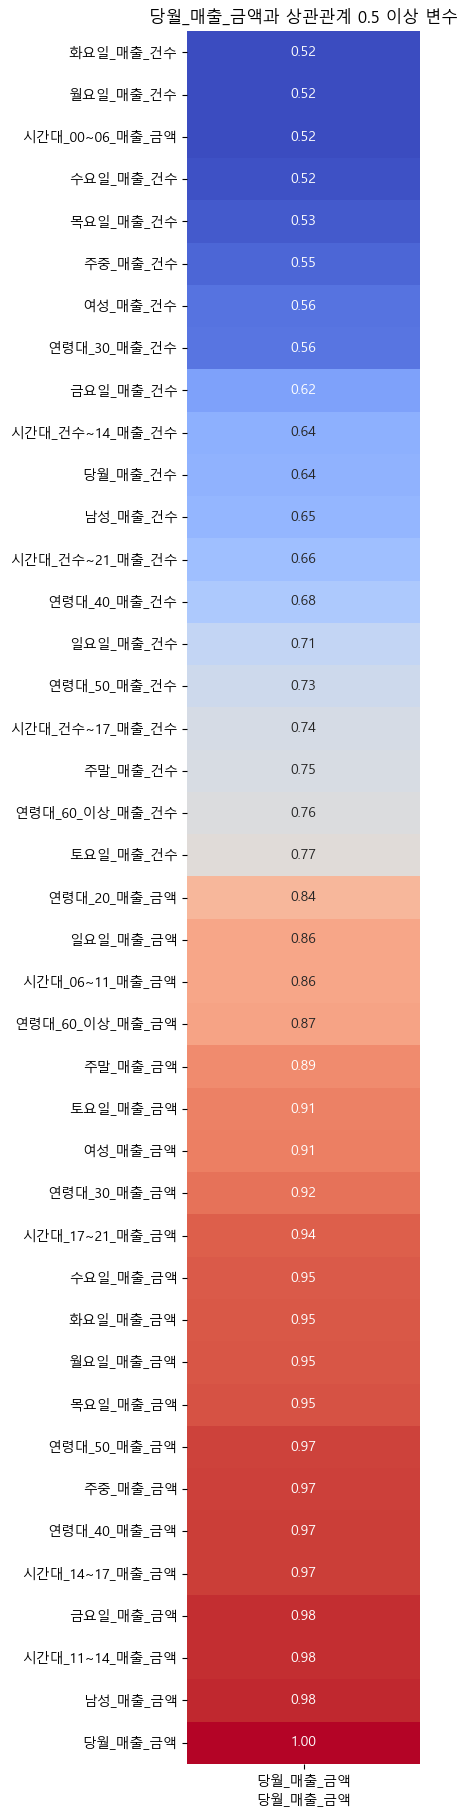

In [130]:
# 상관관계 계산
corr_matrix = df.corr()

# '당월_매출_금액'과의 상관관계 중 0.5 이상인 변수 선택
target_corr = corr_matrix[['당월_매출_금액']].query("`당월_매출_금액` >= 0.5").sort_values(by='당월_매출_금액')

# 히트맵 그리기
plt.figure(figsize=(3, len(target_corr) * 0.5 + 2))  # 세로 길이 조절
sns.heatmap(target_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=False)

# 시각적 설정
plt.title("당월_매출_금액과 상관관계 0.5 이상 변수")
plt.xlabel("당월_매출_금액")  # X축 이름 설정
plt.ylabel("")  # Y축 이름 제거

plt.show()

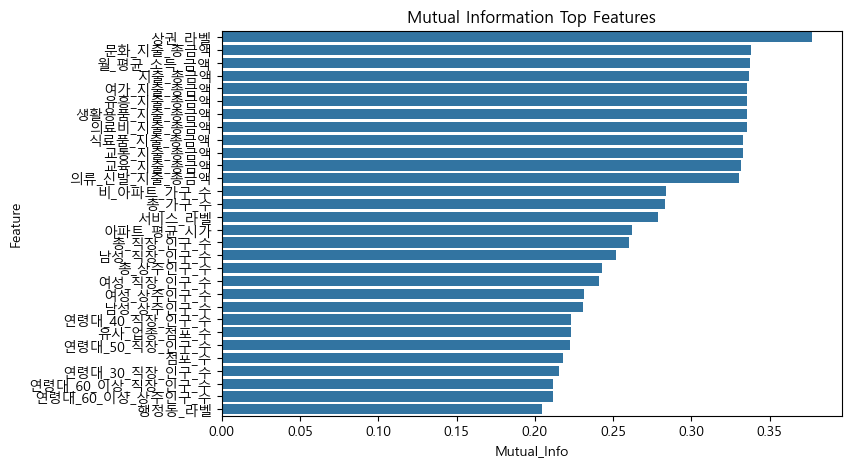

In [132]:
# Mutual Information 계산 (비선형 관계 포함)
X = df.drop(columns=['당월_매출_금액'])
y = df['당월_매출_금액']
mi_values = mutual_info_regression(X, y, random_state=42)

# DataFrame으로 정리
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mi_values})
mi_df = mi_df.sort_values(by='Mutual_Info', ascending=False)

# 매출이 포함되지 않은 컬럼
filtered_mi_df = mi_df[~mi_df['Feature'].str.contains("매출")]

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=filtered_mi_df.head(30), x='Mutual_Info', y='Feature')
plt.title("Mutual Information Top Features")
plt.show()